In [1]:
!pip install https://github.com/gkhayes/mlrose/archive/refs/heads/master.zip
import pandas as pd
import numpy as np
import torch
import gc
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pymop import Problem
import os
from tslearn.datasets import UCR_UEA_datasets
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn


In [2]:
dataset='ElectricDevices'
X_train,train_y,X_test,test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train
test_x=X_test
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder_tf.pkl','wb'))
#enc1=pickle.load(open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
test_y=enc1.transform(test_y.reshape(-1,1))
n_classes = test_y.shape[1]


In [3]:
import tensorflow as tf 
model = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')


2023-06-06 10:13:09.918080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 10:13:12.081848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-06 10:13:12.081965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-06 10:13:12.081977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
observation_01= X_test[0]
label_01 =test_y[0]

print(observation_01.shape)
print(label_01.shape)


(96, 1)
(7,)


In [5]:
from TSInterpret.InterpretabilityModels.counterfactual.TSEvoCF import TSEvo
exp =TSEvo(model= model,data=(test_x,test_y), backend='TF',mode='time',epochs =100)

<class 'numpy.ndarray'>
y was one Hot Encoded


In [6]:

pop,label_cf=exp.explain(observation_01.reshape(1,-1,1),np.array([np.argmax(label_01)]))

(1, 1, 96)
No Target


In [7]:
np.array(pop).shape

(1, 96)

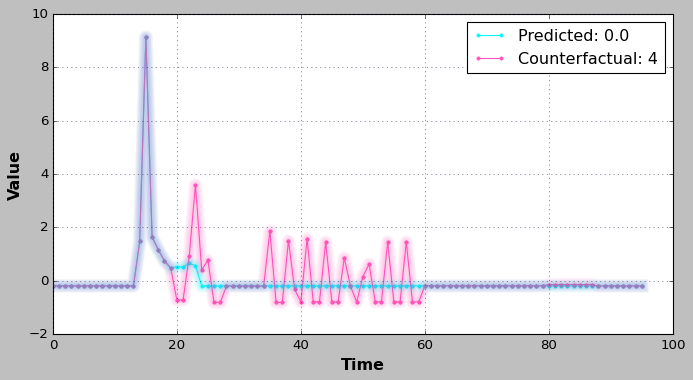

In [8]:
exp.plot_in_one(observation_01.reshape(1,-1,1),label_01[0],pop,np.argmax(label_cf),save_fig=None)